##### 1. Explore the values -- to decide the scaling factor alpha -- find it should be 10

In [2]:
import h5py
import numpy as np

path = "../data/lotka_volterra_data.h5"

with h5py.File(path, "r") as f:
    trajectories = f["trajectories"][:]
    timepoints = f["time"][:]

print(np.max(trajectories), np.argmax(trajectories))

13.740113 64466


In [3]:
print(trajectories.reshape(-1)[64460:64470])

[13.598518    0.06114353 13.677588    0.07237164 13.724124    0.08575575
 13.740113    0.10166209 13.726968    0.12051754]


##### 2. Explore the periods -- by visualise few systems -- to decide the predicting scale.

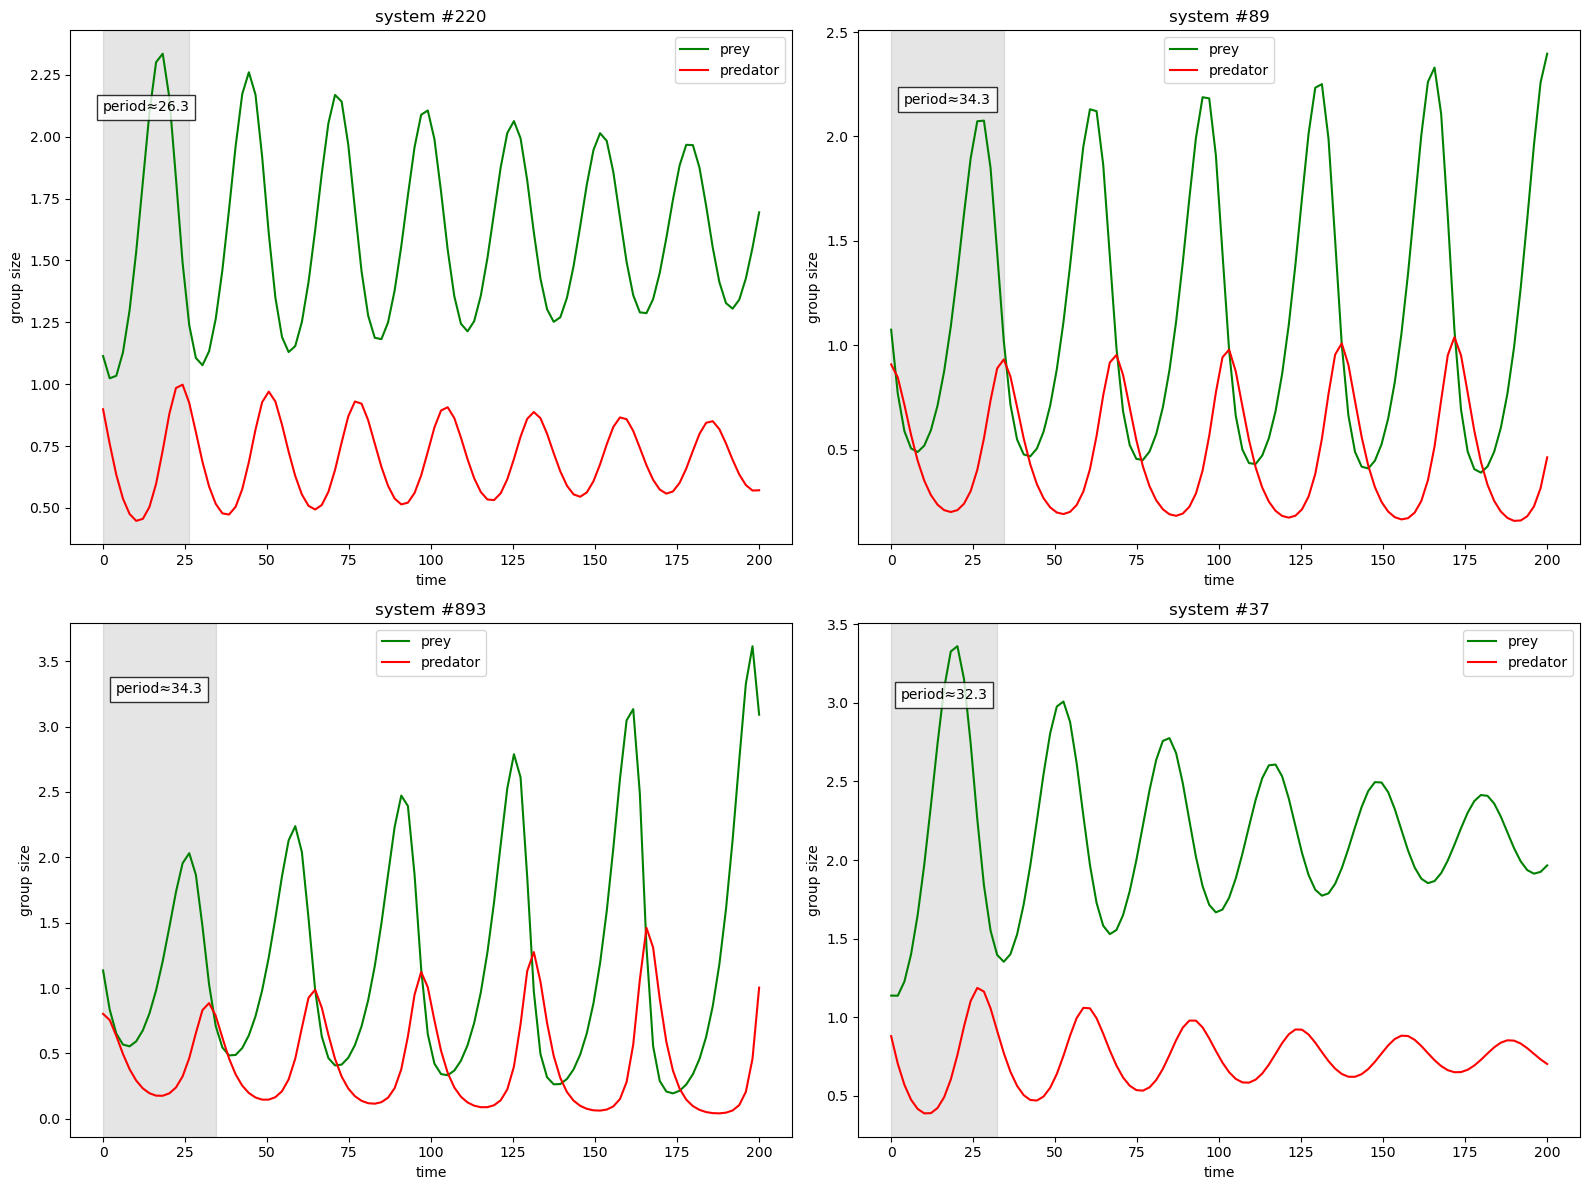

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(1224)
sample_idxs = np.random.choice(trajectories.shape[0], 4, replace=False)

plt.figure(figsize=(16, 12))

for i, idx in enumerate(sample_idxs):
    plt.subplot(2, 2, i+1)
    
    prey = trajectories[idx, :, 0]
    predator = trajectories[idx, :, 1]
    plt.plot(timepoints, prey, 'g-', label='prey')
    plt.plot(timepoints, predator, 'r-', label='predator')
    
    plt.title(f'system #{idx+1}')
    plt.xlabel('time')
    plt.ylabel('group size')
    plt.legend()
    
    # use autocorrelation to estimate the periods
    prey_acf = np.correlate(prey - np.mean(prey), prey - np.mean(prey), mode='full')
    prey_acf = prey_acf[len(prey_acf)//2:] 
    
    # Skip the first few points to avoid autocorrelation of 1
    skip = 5
    peak_idx = skip + np.argmax(prey_acf[skip:])
    period = timepoints[peak_idx]
    
    plt.axvspan(0, period, alpha=0.2, color='gray')
    plt.text(period/2, max(np.max(prey), np.max(predator)) * 0.9, 
             f'period≈{period:.1f}', 
             ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

calculate period:   0%|          | 0/1000 [00:00<?, ?it/s]

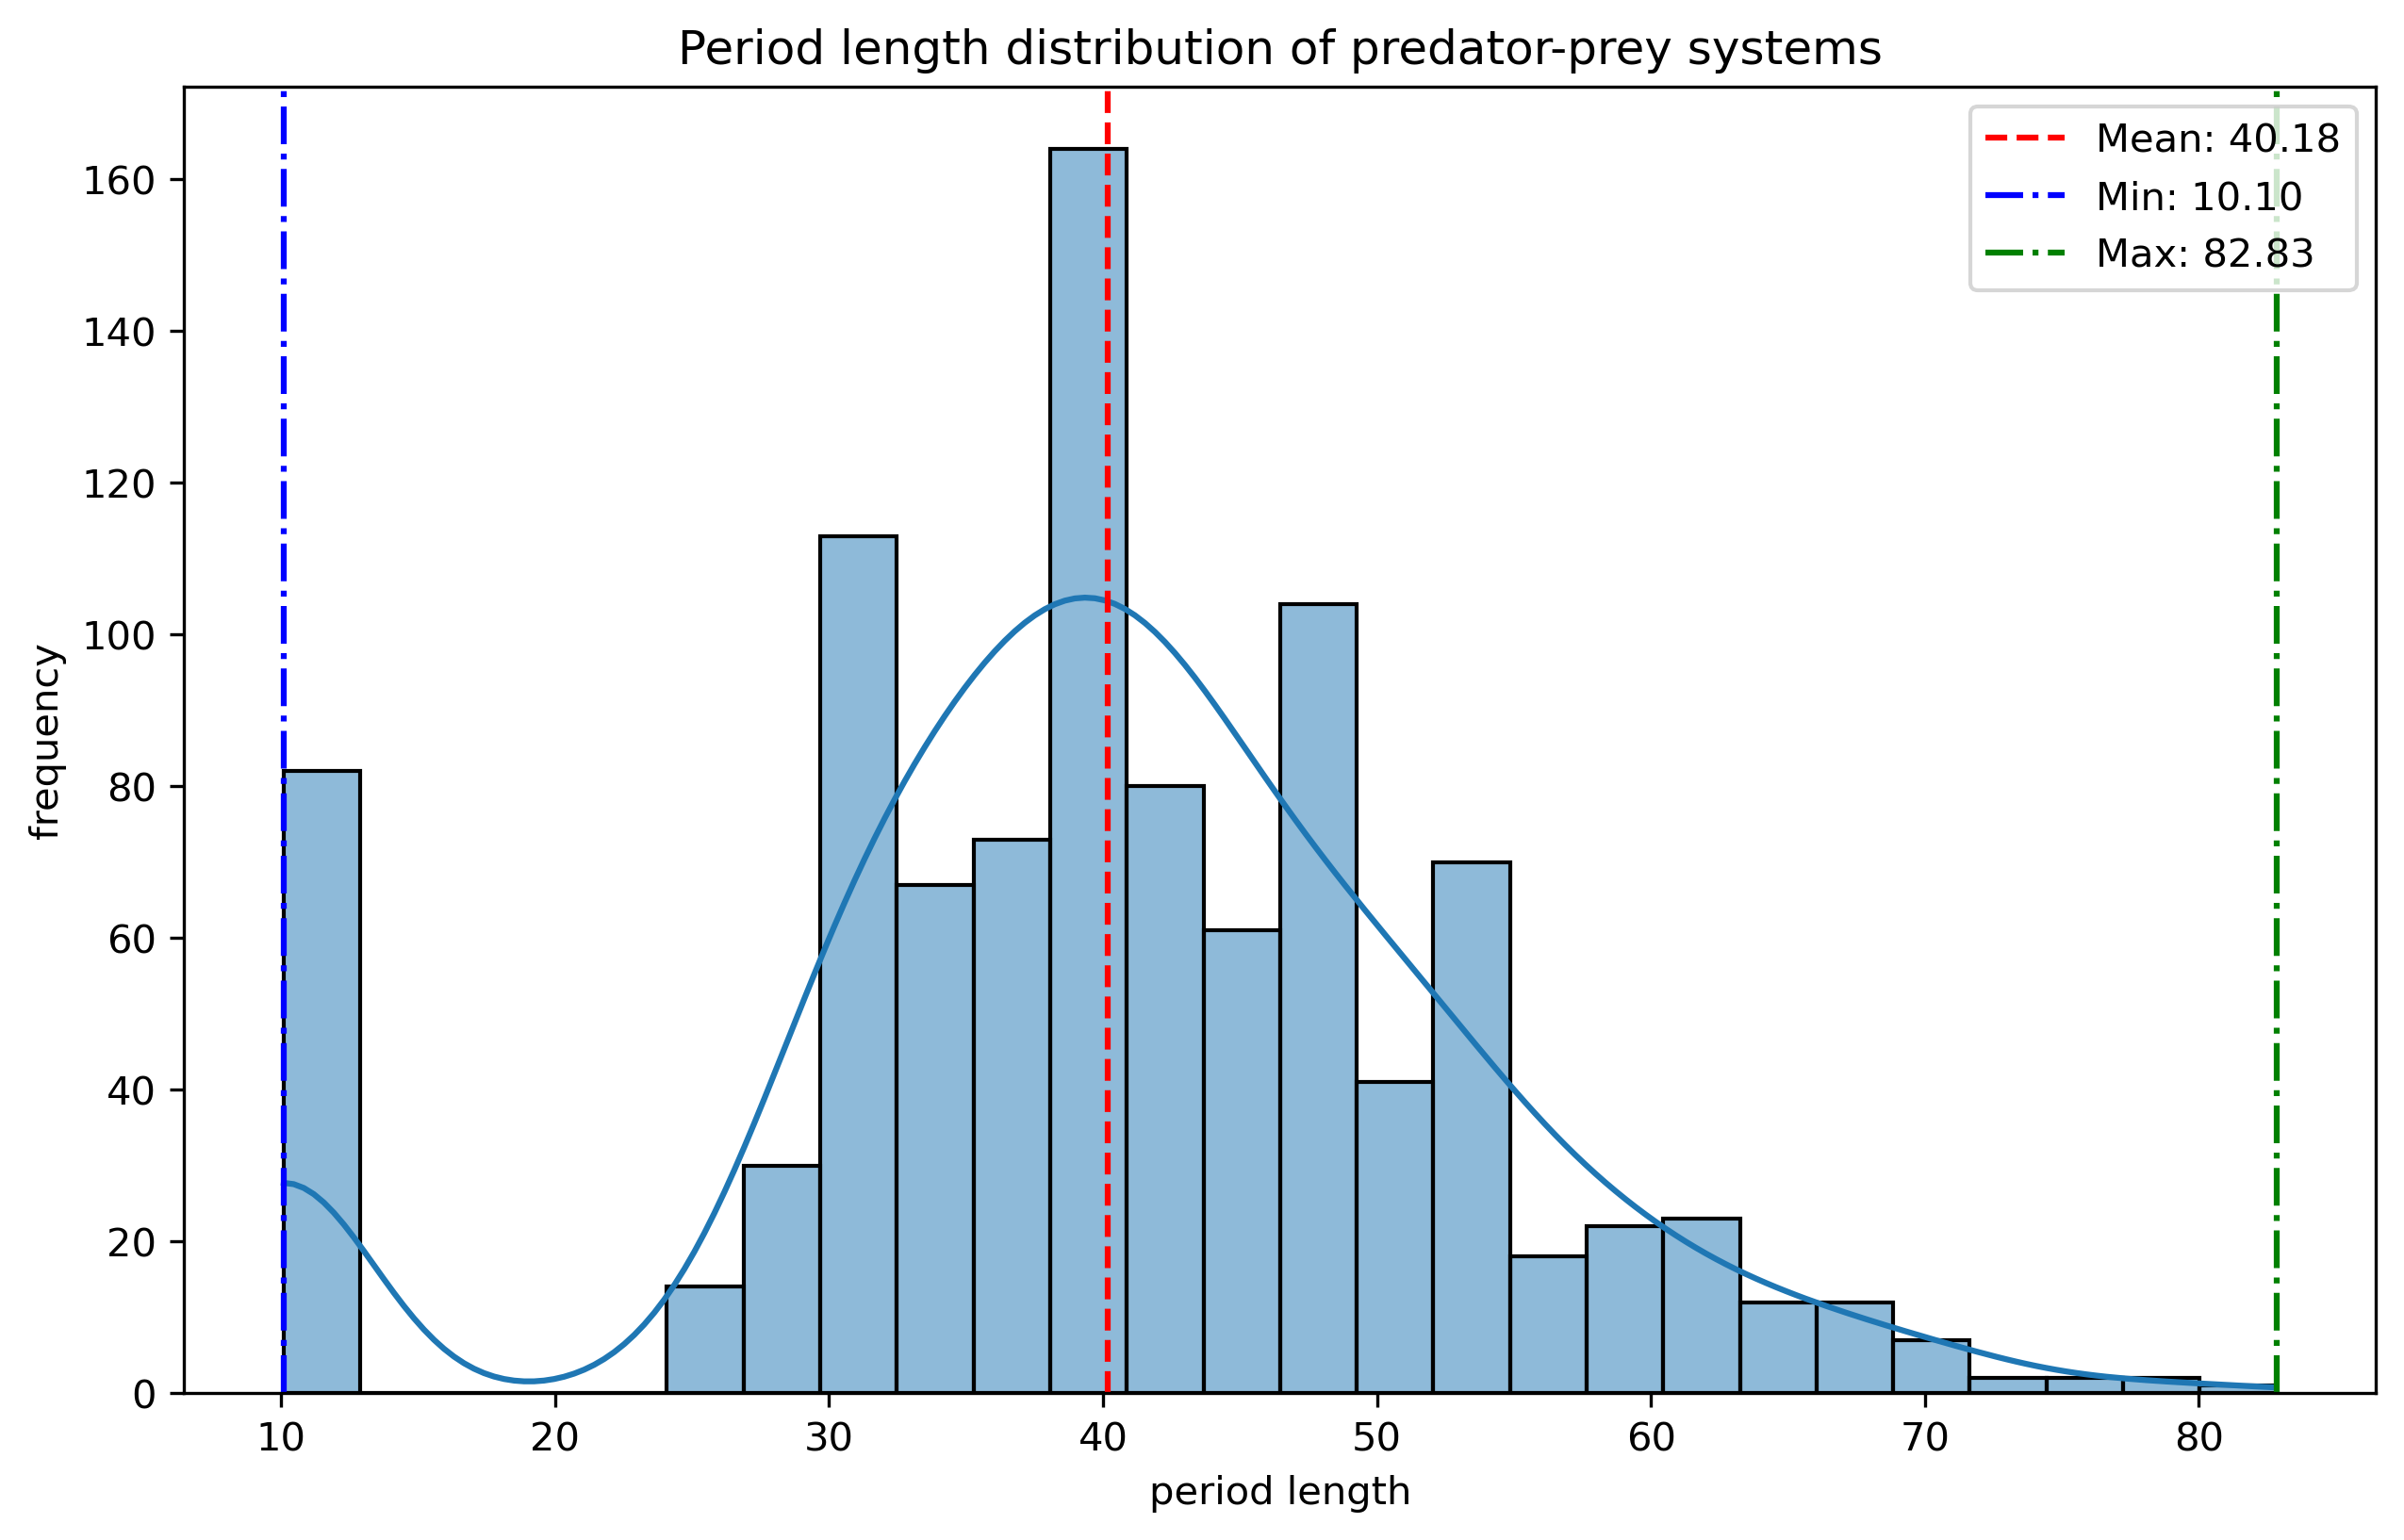

In [5]:
from tqdm.notebook import tqdm
import seaborn as sns

periods = []

for i in tqdm(range(trajectories.shape[0]), desc="calculate periods"):
    prey = trajectories[i, :, 0]
    
    # use autocorrelation to estimate the periods
    prey_acf = np.correlate(prey - np.mean(prey), prey - np.mean(prey), mode='full')
    prey_acf = prey_acf[len(prey_acf)//2:]
    
    # find the first peak
    skip = 5
    if len(prey_acf) <= skip:
        continue  # skip short sequences
        
    peak_idx = skip + np.argmax(prey_acf[skip:])
    
    if peak_idx < len(timepoints):
        periods.append(timepoints[peak_idx])

plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(periods, kde=True)
plt.axvline(np.mean(periods), color='red', linestyle='--', 
            label=f'Mean: {np.mean(periods):.2f}')
plt.axvline(np.min(periods), color='b', linestyle='-.', 
            label=f'Min: {np.min(periods):.2f}')
plt.axvline(np.max(periods), color='g', linestyle='-.', 
            label=f'Max: {np.max(periods):.2f}')

plt.title('periods length distribution of predator-prey systems')
plt.xlabel('periods length')
plt.ylabel('frequency')
plt.legend()
plt.show()